# Case Study 2 : Data Science in Financial Data

**Recommended Readings:** 
* [Quantopian Tutorials](https://www.quantopian.com/tutorials/) 
* Please register an account in [Quantopian online notebook system](https://www.quantopian.com/notebooks/).
* Upload this file into the system and start working on your idea.


**NOTE**
* Please download your code (notebook file as an ipynb file) and include it in your submission.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
Hedge funds often operate on a fundamental principle: Higher the risk, higher the reward.

It basically translates to higher returns on high risk equities and securities. 
Hedge fund managers make money for their investors by investing on riskier equities trading through stocks or options. 
By doing so, they are raising the potential for total losses for the investor.


# Data Collection/Processing: 

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import EquityPricing
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.research import run_pipeline,returns, symbols, get_pricing
from quantopian.pipeline.data.psychsignal import twitter_withretweets as twitter_sentiment
from quantopian.pipeline.factors import SimpleMovingAverage, DailyReturns
from quantopian.pipeline.filters.morningstar import Q1500US

Created and Run a Pipeline that will contain factors such as estimated_growth_factor, PE_ratio, mean_sentiment_5day and positive_sentiment_pct.

In [225]:
#Creating and running the pipeline that contains some of the crucial factors.
billion = 1000000000
#setting the universe
universe = Q1500US()

# Construct a factor that simply gets the price value.

# Get the latest daily price for all equities.
price = EquityPricing.open.latest

#get the volume for all equities
volume = EquityPricing.volume.latest

#Calculating the market capital
market_cap= morningstar.valuation.market_cap.latest

#Getting the Earnings per share
norm_eps = morningstar.earnings_report.normalized_basic_eps.latest


#get the P/E ratio
pe_ratio = morningstar.valuation_ratios.pe_ratio.latest 

#get the PEG ratio
peg_ratio = morningstar.valuation_ratios.peg_ratio.latest 


# Define a 5-day simple moving average sentiment factor.
mean_sentiment_5day = SimpleMovingAverage(inputs=[sentiment.sentiment_signal], window_length=5)


# Define a positive sentiment percent factor, dividing the number of bull
# scored messages by the total number of scanned messages for the equity.
positive_sentiment_pct = (
    twitter_sentiment.bull_scored_messages.latest
    / twitter_sentiment.total_scanned_messages.latest
)



# Add the factor to the pipeline.
pipe = Pipeline(
            columns={
            'open_price':price,
            'norm_eps': Norm_EPS,
            'pe_ratio': pe_ratio,
            'peg_ratio': peg_ratio,
            'mean_sentiment_5day': mean_sentiment_5day,
            'positive_sentiment_pct': positive_sentiment_pct,
            'market_cap' : market_cap,
            'big_business': 10 * billion < market_cap < 2000 * billion
            },
        screen = universe,
        domain=US_EQUITIES,
    )

# Run the pipeline over a year and print the result.
factor_data = run_pipeline(pipe, '2020-10-20', '2020-10-20')
print("Result contains {} rows of output.".format(len(factor_data)))
factor_data.head()


Result contains 1490 rows of output.


big_business    market_cap  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])           True  8.116593e+09   
                          Equity(24 [AAPL])         True  1.983552e+12   
                          Equity(53 [ABMD])         True  1.267945e+10   
                          Equity(62 [ABT])          True  1.912881e+11   
                          Equity(67 [ADSK])         True  5.699943e+10   

                                             mean_sentiment_5day  norm_eps  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])                   -1.0 -0.109330   
                          Equity(24 [AAPL])                  1.0  0.652500   
                          Equity(53 [ABMD])                  NaN  0.951124   
                          Equity(62 [ABT])                  -1.0  0.299588   
                          Equity(67 [ADSK])                  5.0  0.483339   

                                             open_price    pe_ratio  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])         18.60   14.426357   
                          Equity(24 [AAPL])      119.96   35.172100   
                          Equity(53 [ABMD])      287.58   80.882184   
                          Equity(62 [ABT])       109.90   62.813953   
                          Equity(67 [ADSK])      262.67  159.472393   

                                             peg_ratio  positive_sentiment_pct  
2020-10-20 00:00:00+00:00 Equity(2 [HWM])       0.5761                0.017857  
                          Equity(24 [AAPL])     2.8636                0.202644  
                          Equity(53 [ABMD])     1.3815                0.260417  
                          Equity(62 [ABT])      3.4345                0.291667  
                          Equity(67 [ADSK])     1.4956                0.352941

Checking for null data in the dataframe

In [226]:
factor_data.isnull().sum()

big_business                 0
market_cap                   0
mean_sentiment_5day       1063
norm_eps                    13
open_price                   0
pe_ratio                   122
peg_ratio                  289
positive_sentiment_pct      24
dtype: int64

In [227]:
factor_data.dropna(axis=0,inplace=True)
factor_data.head(10)

big_business    market_cap  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])            True  8.116593e+09   
                          Equity(24 [AAPL])          True  1.983552e+12   
                          Equity(62 [ABT])           True  1.912881e+11   
                          Equity(67 [ADSK])          True  5.699943e+10   
                          Equity(76 [TAP])           True  7.567374e+09   
                          Equity(114 [ADBE])         True  2.375568e+11   
                          Equity(122 [ADI])          True  4.531172e+10   
                          Equity(128 [ADM])          True  2.795459e+10   
                          Equity(161 [AEP])          True  4.528907e+10   
                          Equity(166 [AES])          True  1.323611e+10   

                                              mean_sentiment_5day  norm_eps  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])                    -1.0 -0.109330   
                          Equity(24 [AAPL])                   1.0  0.652500   
                          Equity(62 [ABT])                   -1.0  0.299588   
                          Equity(67 [ADSK])                   5.0  0.483339   
                          Equity(76 [TAP])                   -1.0  1.116408   
                          Equity(114 [ADBE])                  2.0  1.969384   
                          Equity(122 [ADI])                  -1.0  1.063892   
                          Equity(128 [ADM])                   2.0  0.766845   
                          Equity(161 [AEP])                  -3.0  0.980941   
                          Equity(166 [AES])                   6.0 -0.051899   

                                              open_price    pe_ratio  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])          18.60   14.426357   
                          Equity(24 [AAPL])       119.96   35.172100   
                          Equity(62 [ABT])        109.90   62.813953   
                          Equity(67 [ADSK])       262.67  159.472393   
                          Equity(76 [TAP])         35.46   35.063063   
                          Equity(114 [ADBE])      507.75   62.367758   
                          Equity(122 [ADI])       124.62   41.006689   
                          Equity(128 [ADM])        50.71   16.022293   
                          Equity(161 [AEP])        91.43   23.832898   
                          Equity(166 [AES])        19.90   71.071429   

                                              peg_ratio  \
2020-10-20 00:00:00+00:00 Equity(2 [HWM])        0.5761   
                          Equity(24 [AAPL])      2.8636   
                          Equity(62 [ABT])       3.4345   
                          Equity(67 [ADSK])      1.4956   
                          Equity(76 [TAP])      24.9502   
                          Equity(114 [ADBE])     2.3634   
                          Equity(122 [ADI])      2.4019   
                          Equity(128 [ADM])      2.0547   
                          Equity(161 [AEP])      2.8699   
                          Equity(166 [AES])      1.8838   

                                              positive_sentiment_pct  
2020-10-20 00:00:00+00:00 Equity(2 [HWM])                   0.017857  
                          Equity(24 [AAPL])                 0.202644  
                          Equity(62 [ABT])                  0.291667  
                          Equity(67 [ADSK])                 0.352941  
                          Equity(76 [TAP])                  0.156250  
                          Equity(114 [ADBE])                0.250000  
                          Equity(122 [ADI])                 0.160000  
                          Equity(128 [ADM])                 0.269231  
                          Equity(161 [AEP])                 0.052632  
                          Equity(166 [AES])                 0.000000

In [228]:
factor_data = factor_data[factor_data['big_business'] == True]

In [229]:
factor_data.index = factor_data.index.droplevel(0)  #dropping date index

In [230]:
factor_data.head(10)

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct
Equity(2 [HWM]),True,8.116593e+09,-1.0,-0.109330,18.60,14.426357,0.5761,0.017857
Equity(24 [AAPL]),True,1.983552e+12,1.0,0.652500,119.96,35.172100,2.8636,0.202644
Equity(62 [ABT]),True,1.912881e+11,-1.0,0.299588,109.90,62.813953,3.4345,0.291667
Equity(67 [ADSK]),True,5.699943e+10,5.0,0.483339,262.67,159.472393,1.4956,0.352941
Equity(76 [TAP]),True,7.567374e+09,-1.0,1.116408,35.46,35.063063,24.9502,0.156250
Equity(114 [ADBE]),True,2.375568e+11,2.0,1.969384,507.75,62.367758,2.3634,0.250000
Equity(122 [ADI]),True,4.531172e+10,-1.0,1.063892,124.62,41.006689,2.4019,0.160000
Equity(128 [ADM]),True,2.795459e+10,2.0,0.766845,50.71,16.022293,2.0547,0.269231
Equity(161 [AEP]),True,4.528907e+10,-3.0,0.980941,91.43,23.832898,2.8699,0.052632
Equity(166 [AES]),True,1.323611e+10,6.0,-0.051899,19.90,71.071429,1.8838,0.000000


In [231]:
factor_data.drop(['big_business'], axis=1)

,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct
Equity(2 [HWM]),8.116593e+09,-1.0,-0.109330,18.600,14.426357,0.5761,0.017857
Equity(24 [AAPL]),1.983552e+12,1.0,0.652500,119.960,35.172100,2.8636,0.202644
Equity(62 [ABT]),1.912881e+11,-1.0,0.299588,109.900,62.813953,3.4345,0.291667
Equity(67 [ADSK]),5.699943e+10,5.0,0.483339,262.670,159.472393,1.4956,0.352941
Equity(76 [TAP]),7.567374e+09,-1.0,1.116408,35.460,35.063063,24.9502,0.156250
Equity(114 [ADBE]),2.375568e+11,2.0,1.969384,507.750,62.367758,2.3634,0.250000
Equity(122 [ADI]),4.531172e+10,-1.0,1.063892,124.620,41.006689,2.4019,0.160000
Equity(128 [ADM]),2.795459e+10,2.0,0.766845,50.710,16.022293,2.0547,0.269231
Equity(161 [AEP]),4.528907e+10,-3.0,0.980941,91.430,23.832898,2.8699,0.052632
Equity(166 [AES]),1.323611e+10,6.0,-0.051899,19.900,71.071429,1.8838,0.000000


Getting the pricing data for the last entire year

In [232]:
#Get the pricing data for Daily Pricing
daily_price = get_pricing(
          factor_data.index, #symbols,
          fields ={'open_price','close_price','high','low'}, #price, open_price, close_price, high, low or volume
          start_date = '2019-10-20',
          end_date = pd.datetime.today(),
          frequency = 'daily'
          )

print(type(daily_price))

<class 'pandas.core.panel.Panel'>


In [233]:
daily_price = daily_price.to_frame()
daily_price.head()

close_price  open_price      low  \
major                     minor                                                 
2019-10-21 00:00:00+00:00 Equity(2 [HWM])         27.004      27.094   26.914   
                          Equity(24 [AAPL])       59.542      58.797   58.747   
                          Equity(62 [ABT])        80.373      81.850   80.250   
                          Equity(67 [ADSK])      141.500     140.900  139.200   
                          Equity(76 [TAP])        55.885      55.895   55.685   

                                                high  
major                     minor                       
2019-10-21 00:00:00+00:00 Equity(2 [HWM])     27.323  
                          Equity(24 [AAPL])   59.656  
                          Equity(62 [ABT])    81.988  
                          Equity(67 [ADSK])  142.365  
                          Equity(76 [TAP])    56.022

In [234]:
# compute returns
r = returns(
    assets= factor_data.index,
    start='2019-10-20',
    end='2020-10-20',
    frequency ='daily'
)
r.head()


,Equity(2 [HWM]),Equity(24 [AAPL]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),Equity(166 [AES]),...,Equity(42277 [ZNGA]),Equity(42788 [PSX]),Equity(42950 [FB]),Equity(43694 [ABBV]),Equity(44931 [NWSA]),Equity(45815 [TWTR]),Equity(50428 [AA]),Equity(50869 [IR]),Equity(51157 [DD]),Equity(52747 [DELL])
2019-10-21 00:00:00+00:00,0.001483,0.017986,-0.013889,0.013320,0.003159,0.005236,0.014978,0.018665,0.003717,0.003665,...,0.009631,0.009332,0.020930,0.011125,0.013358,0.028476,-0.049687,0.008752,0.005962,0.002406
2019-10-22 00:00:00+00:00,0.001481,-0.002334,-0.013475,-0.010247,0.037255,-0.021548,-0.001976,0.004459,-0.003496,0.027953,...,-0.023847,0.005265,-0.039209,0.007631,0.014672,-0.031679,0.013438,0.027635,-0.000760,0.000200
2019-10-23 00:00:00+00:00,0.006286,0.013215,0.009068,0.013424,0.002864,0.001226,-0.048068,0.003929,0.003508,0.014209,...,-0.011401,0.001653,0.021173,-0.002181,-0.000734,0.000000,0.026519,0.018136,0.011692,0.006000
2019-10-24 00:00:00+00:00,0.006247,0.001894,0.001100,0.024237,-0.009581,0.031751,-0.002563,-0.004422,0.013022,-0.015761,...,0.014827,0.015150,0.001128,-0.011961,-0.001469,-0.208140,-0.026303,-0.009214,-0.005402,0.014314
2019-10-25 00:00:00+00:00,0.007669,0.012222,0.003446,0.001307,-0.034806,0.004709,0.014535,0.011589,-0.014106,-0.004111,...,-0.003247,0.034715,0.007994,-0.003518,-0.001765,-0.014314,0.013507,0.016119,0.008286,0.012544


In [235]:
r.shape

(253, 424)

Finding Columns with null values

In [236]:
r.columns[r.isnull().any()] # no null values

Index([], dtype='object')

In [237]:
#compute mean of the returns
ar = r.mean()

#compute standard deviations of the returns
sr = r.std()

#compute sharpe ratio 
sharpe_ratio = ar.div(sr)

sharpe_ratio.head()

Equity(2 [HWM])      0.020675
Equity(24 [AAPL])    0.110745
Equity(62 [ABT])     0.058216
Equity(67 [ADSK])    0.093341
Equity(76 [TAP])    -0.054381
dtype: float64

Add the Sharpe Ratio and Money being traded to your dataframe

In [238]:
factor_data['sharpe_ratio'] = sharpe_ratio
factor_data.head()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(2 [HWM]),True,8.116593e+09,-1.0,-0.109330,18.60,14.426357,0.5761,0.017857,0.020675
Equity(24 [AAPL]),True,1.983552e+12,1.0,0.652500,119.96,35.172100,2.8636,0.202644,0.110745
Equity(62 [ABT]),True,1.912881e+11,-1.0,0.299588,109.90,62.813953,3.4345,0.291667,0.058216
Equity(67 [ADSK]),True,5.699943e+10,5.0,0.483339,262.67,159.472393,1.4956,0.352941,0.093341
Equity(76 [TAP]),True,7.567374e+09,-1.0,1.116408,35.46,35.063063,24.9502,0.156250,-0.054381


# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc868c03470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fc86c8fb7f0>], dtype=object)

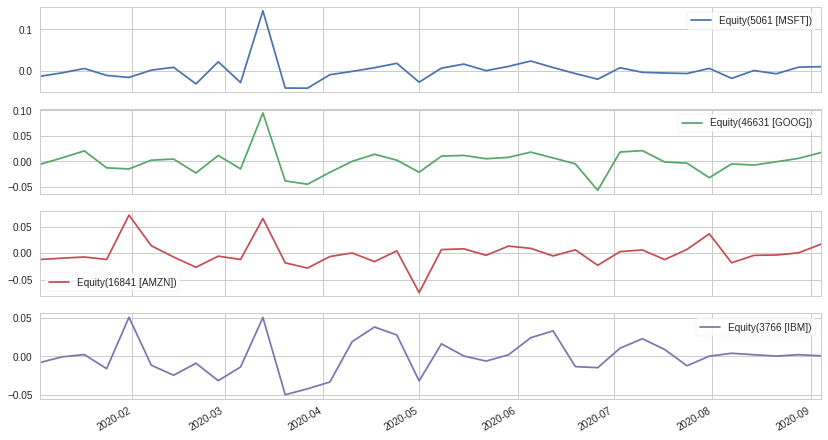

In [239]:
# computing daily returns for Microsoft, Google, Amazon and IBM
r_daily = returns(
    assets=symbols(["MSFT","GOOG","AMZN","IBM"]),
    start='2020-1-1',
    end='2020-9-1',
    frequency='daily'
)

# resampling dataframe to get weekly data
r_weekly = r_daily.resample('W-FRI', closed='right', label='right').last()
r_weekly.plot(subplots=True) 

Exploration of the factors used. 

In [240]:
factor_data.describe()

,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
count,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,6.171712e+10,1.033019,0.729175,118.615468,43.242000,7.919995,0.182544,0.022354
std,1.617156e+11,2.839912,1.988465,218.979233,88.600389,44.782673,0.141272,0.036352
min,5.582820e+08,-3.000000,-10.274240,2.780000,1.660606,-0.078000,0.000000,-0.067247
25%,9.189713e+09,-1.000000,-0.028729,31.700000,15.172279,1.494825,0.090909,-0.002437
50%,2.345797e+10,1.000000,0.560476,70.365000,23.722108,2.483250,0.153846,0.020067
75%,5.675175e+10,3.000000,1.331208,130.399500,37.175243,4.016125,0.250000,0.045629
max,1.983552e+12,6.000000,14.660000,3299.610000,1040.652174,839.318200,1.000000,0.177410


Listing top 5 equities by Market Capitalization

In [241]:
factor_data.sort_values(by="market_cap", ascending=False).head()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(24 [AAPL]),True,1.983552e+12,1.0,0.652500,119.960,35.172100,2.8636,0.202644,0.110745
Equity(5061 [MSFT]),True,1.621143e+12,-1.0,1.402847,220.415,37.190972,2.5316,0.138374,0.080439
Equity(16841 [AMZN]),True,1.606458e+12,-1.0,10.500000,3299.610,123.259416,1.2063,0.191019,0.114303
Equity(42950 [FB]),True,7.446805e+11,-1.0,1.820000,265.530,31.955990,0.9467,0.231385,0.066120
Equity(35920 [V]),True,4.324357e+11,-3.0,1.041907,200.850,37.446768,2.3229,0.162218,0.031738


Listing bottom 5 equities by Market Capitalization

In [242]:
factor_data.sort_values(by="market_cap", ascending=False).tail()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(23438 [GME]),True,906397995.0,-1.0,-1.826800,13.44,404.000000,0.3127,0.333333,0.080487
Equity(12959 [DDD]),True,841888972.0,-1.0,-0.324495,6.89,212.574378,0.8503,0.300000,0.008894
Equity(24811 [GES]),True,803400286.0,-3.0,-0.185856,13.18,7.676692,0.6212,0.500000,0.028153
Equity(25867 [PETS]),True,613635619.0,-1.0,0.390000,32.17,21.316901,2.3225,0.000000,0.066376
Equity(42118 [GRPN]),True,558281995.0,-1.0,-1.292035,20.53,300.000000,0.7207,0.192308,0.062537


Listing top 5 equities by Sharpe Ratio (highest returns and low risk)

In [243]:
factor_data.sort_values(by="sharpe_ratio", ascending=False).head()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(39840 [TSLA]),True,4.021971e+11,5.0,0.112000,446.240,1040.652174,1.0184,0.114574,0.177410
Equity(6297 [QDEL]),True,1.081013e+10,4.0,1.627392,257.290,72.384831,2.1552,0.500000,0.136097
Equity(19725 [NVDA]),True,3.335099e+11,-3.0,1.010000,556.115,99.066055,3.3712,0.250000,0.135601
Equity(351 [AMD]),True,9.627265e+10,2.0,0.130000,83.620,157.692308,1.4130,0.253870,0.119806
Equity(16841 [AMZN]),True,1.606458e+12,-1.0,10.500000,3299.610,123.259416,1.2063,0.191019,0.114303


Listing bottom 5 equities by Sharpe Ratio 

In [244]:
factor_data.sort_values(by="sharpe_ratio", ascending=False).tail()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(76 [TAP]),True,7.567374e+09,-1.0,1.116408,35.46,35.063063,24.9502,0.156250,-0.054381
Equity(9540 [EQR]),True,1.887478e+10,2.0,0.312241,52.12,16.791391,13.0026,0.000000,-0.055845
Equity(7883 [RTX]),True,9.388969e+10,3.0,-0.461039,61.60,42.979021,0.9035,0.400000,-0.059399
Equity(8151 [WFC]),True,9.314693e+10,-1.0,-0.660000,22.89,57.794872,1.9707,0.065421,-0.061147
Equity(8347 [XOM]),True,1.413076e+11,2.0,-0.260000,34.10,19.892857,1.9087,0.156134,-0.067247


Listing top 5 by Postive Sentiment Percentage (most popular stocks on Twitter)

In [245]:
factor_data.sort_values(by="positive_sentiment_pct", ascending=False).head()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(26437 [PDCO]),True,2.563016e+09,4.0,0.269152,27.38,40.060000,3.5941,1.000000,0.069568
Equity(3490 [PEAK]),True,1.428700e+10,5.0,0.045260,27.26,42.806452,37.2549,1.000000,-0.011835
Equity(8168 [WGO]),True,1.847384e+09,-1.0,-0.370000,55.57,34.917197,1.4360,0.882353,0.052175
Equity(52747 [DELL]),True,5.189685e+10,-1.0,1.390297,70.40,25.272727,2.0606,0.666667,0.056846
Equity(51157 [DD]),True,4.288488e+10,-1.0,0.240723,59.35,13.910272,25.6694,0.600000,0.006787


Listing bottom 5 by Postive Sentiment Percentage

In [246]:
factor_data.sort_values(by="positive_sentiment_pct", ascending=False).tail()

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(35081 [CIM]),True,1.958256e+09,2.0,-0.371681,8.66,4.331492,3.3319,0.0,-0.038089
Equity(15622 [ANF]),True,9.355976e+08,-1.0,0.196262,15.63,19.366667,3.7091,0.0,0.020556
Equity(15581 [SRCL]),True,6.064401e+09,-3.0,-0.019650,66.49,25.768786,2.7085,0.0,0.041881
Equity(9540 [EQR]),True,1.887478e+10,2.0,0.312241,52.12,16.791391,13.0026,0.0,-0.055845
Equity(7285 [SYY]),True,3.275505e+10,2.0,-1.220000,65.83,153.190476,1.9161,0.0,0.004205


In [248]:
factor_data = factor_data[factor_data['sharpe_ratio']>=0.1]

In [250]:
factor_data

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(24 [AAPL]),True,1.983552e+12,1.0,0.652500,119.960,35.172100,2.8636,0.202644,0.110745
Equity(351 [AMD]),True,9.627265e+10,2.0,0.130000,83.620,157.692308,1.4130,0.253870,0.119806
Equity(2170 [DHR]),True,1.587870e+11,-1.0,0.780004,228.250,56.522727,2.2775,0.125000,0.107406
Equity(6297 [QDEL]),True,1.081013e+10,4.0,1.627392,257.290,72.384831,2.1552,0.500000,0.136097
Equity(7493 [TMO]),True,1.824814e+11,2.0,2.948010,468.870,49.923160,1.8386,0.125000,0.101070
Equity(16841 [AMZN]),True,1.606458e+12,-1.0,10.500000,3299.610,123.259416,1.2063,0.191019,0.114303
Equity(19725 [NVDA]),True,3.335099e+11,-3.0,1.010000,556.115,99.066055,3.3712,0.250000,0.135601
Equity(23709 [NFLX]),True,2.340557e+11,-1.0,1.630000,537.070,89.648649,2.3111,0.266055,0.103942
Equity(39840 [TSLA]),True,4.021971e+11,5.0,0.112000,446.240,1040.652174,1.0184,0.114574,0.177410


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

What if we were to fundamentally transform the way hedge funds operate? 
If we could find a way for hedge funds to invest in equities that are less risky, but still provide a higher return, we are helping investors eliminate a part or all of their risk.

Our project aims at solving this problem by performing a risk analysis on several equities using various factors used to measure the financial health of an equity.
We do so by analyzing the P/E ratio P/E growth ratio, EPS for several past quarters, market capitalization, Sharpe ratio and market sentiment through Twitter.

All the ratios are calculated for an adjusted closing price of an equity. We use a Morningstar fundamental data field called normalized_basic_eps since it is a more accurate representation of a company's 
recent quaterly earnings. The normalized EPS excludes one-time and unusual expenses and acts as a measure for a company's true earnings.

By relying on the accuracy of the factors used to measure a company's fundamentals, we perform due diligence for the investor, reducing a part of the risk.


Write codes to implement the solution in python:

In [188]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

from sklearn.tree import DecisionTreeRegressor



In [254]:
factor_data

,big_business,market_cap,mean_sentiment_5day,norm_eps,open_price,pe_ratio,peg_ratio,positive_sentiment_pct,sharpe_ratio
Equity(24 [AAPL]),True,1.983552e+12,1.0,0.652500,119.960,35.172100,2.8636,0.202644,0.110745
Equity(351 [AMD]),True,9.627265e+10,2.0,0.130000,83.620,157.692308,1.4130,0.253870,0.119806
Equity(2170 [DHR]),True,1.587870e+11,-1.0,0.780004,228.250,56.522727,2.2775,0.125000,0.107406
Equity(6297 [QDEL]),True,1.081013e+10,4.0,1.627392,257.290,72.384831,2.1552,0.500000,0.136097
Equity(7493 [TMO]),True,1.824814e+11,2.0,2.948010,468.870,49.923160,1.8386,0.125000,0.101070
Equity(16841 [AMZN]),True,1.606458e+12,-1.0,10.500000,3299.610,123.259416,1.2063,0.191019,0.114303
Equity(19725 [NVDA]),True,3.335099e+11,-3.0,1.010000,556.115,99.066055,3.3712,0.250000,0.135601
Equity(23709 [NFLX]),True,2.340557e+11,-1.0,1.630000,537.070,89.648649,2.3111,0.266055,0.103942
Equity(39840 [TSLA]),True,4.021971e+11,5.0,0.112000,446.240,1040.652174,1.0184,0.114574,0.177410


In [255]:
factor_data.isnull().sum()

big_business              0
market_cap                0
mean_sentiment_5day       0
norm_eps                  0
open_price                0
pe_ratio                  0
peg_ratio                 0
positive_sentiment_pct    0
sharpe_ratio              0
dtype: int64

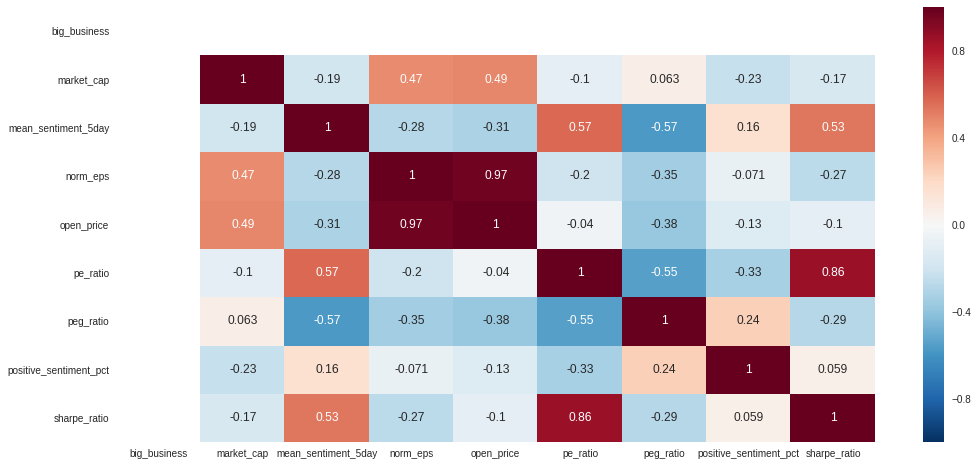

In [256]:
import seaborn as sns
plt.figure(1, figsize = (17,8))
cor = sns.heatmap(factor_data.corr(), annot = True)

There is a strong correlation between open price and normalized eps. Also, between Sharp ration and pe ratio. Also, we find a moderate correation between pe ratio and mean sentiment over a 5 day period.

In [290]:
# Selecting features for the prediction model

X= factor_data.loc[:,'norm_eps']
y= factor_data.loc[:,'open_price']

In [291]:
X.head()

Equity(24 [AAPL])      0.652500
Equity(351 [AMD])      0.130000
Equity(2170 [DHR])     0.780004
Equity(6297 [QDEL])    1.627392
Equity(7493 [TMO])     2.948010
Name: norm_eps, dtype: float64

In [292]:
y.head()

Equity(24 [AAPL])      119.96
Equity(351 [AMD])       83.62
Equity(2170 [DHR])     228.25
Equity(6297 [QDEL])    257.29
Equity(7493 [TMO])     468.87
Name: open_price, dtype: float64

In [293]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=0)

In [294]:
Classifier = DecisionTreeRegressor()

In [295]:
Classifier.fit(X_train, y_train)

ValueError: Number of labels=8 does not match number of samples=1

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary









# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 2".
        
**Note: Each team only needs to submit one submission in Canvas**